In [19]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, normaltest, anderson, spearmanr, chi2_contingency, chi2, kruskal

In [2]:
df = pd.read_csv("winequality-red.csv", delimiter=",", header=0, index_col=False )

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
print('Всего строк: {} \ Уникальных строк: {}'.format(len(df.index),len(df.drop_duplicates().index)))

Всего строк: 1599 \ Уникальных строк: 1359


In [6]:
df = df.drop_duplicates()

In [7]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Одномерный анализ

(array([ 10.,   0.,  53.,   0., 577.,   0., 535.,   0., 167.,  17.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

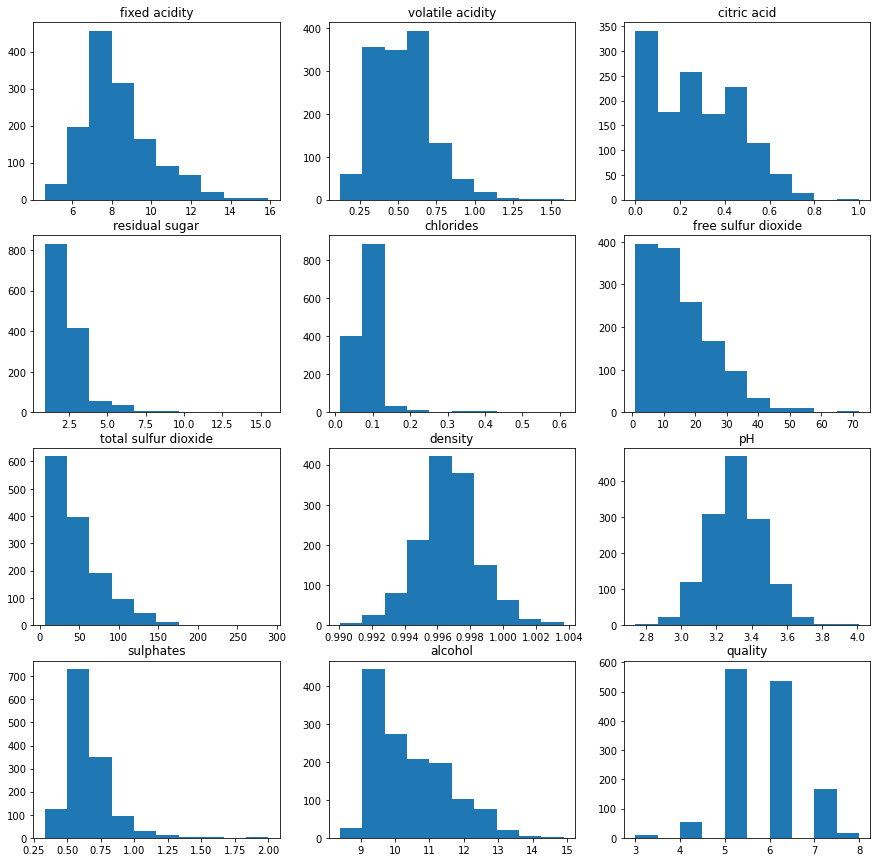

In [8]:
fig, axs = plt.subplots(4, 3,figsize=(15,15))
axs[0, 0].set_title( 'fixed acidity' )
axs[0, 0].hist(df['fixed acidity'])
axs[0, 1].set_title('volatile acidity')
axs[0, 1].hist(df['volatile acidity'])
axs[0, 2].set_title( 'citric acid' )
axs[0, 2].hist(df['citric acid'])
axs[1, 0].set_title( 'residual sugar' )
axs[1, 0].hist(df['residual sugar'])
axs[1, 1].set_title( 'chlorides' )
axs[1, 1].hist(df['chlorides'])
axs[1, 2].set_title( 'free sulfur dioxide' )
axs[1, 2].hist(df['free sulfur dioxide'])
axs[2, 0].set_title( 'total sulfur dioxide' )
axs[2, 0].hist(df['total sulfur dioxide'])
axs[2, 1].set_title( 'density' )
axs[2, 1].hist(df['density'])
axs[2, 2].set_title( 'pH' )
axs[2, 2].hist(df['pH'])
axs[3, 0].set_title( 'sulphates' )
axs[3, 0].hist(df['sulphates'])
axs[3, 1].set_title( 'alcohol' )
axs[3, 1].hist(df['alcohol'])
axs[3, 2].set_title( 'quality' )
axs[3, 2].hist(df['quality'])

## Статистический анализ на норму

### Критерий Шапиро-Уилка 

In [9]:
alpha = 0.05
for column in df:
    stat, p = shapiro(df[column])
    if p > alpha:
        print('p=%.3f. '% (p) +  column + ' looks Gaussian (fail to reject H0)' )
    else:
        print('p=%.3f. '% (p) +  column + ' does not look Gaussian (reject H0)'  )

p=0.000. fixed acidity does not look Gaussian (reject H0)
p=0.000. volatile acidity does not look Gaussian (reject H0)
p=0.000. citric acid does not look Gaussian (reject H0)
p=0.000. residual sugar does not look Gaussian (reject H0)
p=0.000. chlorides does not look Gaussian (reject H0)
p=0.000. free sulfur dioxide does not look Gaussian (reject H0)
p=0.000. total sulfur dioxide does not look Gaussian (reject H0)
p=0.000. density does not look Gaussian (reject H0)
p=0.000. pH does not look Gaussian (reject H0)
p=0.000. sulphates does not look Gaussian (reject H0)
p=0.000. alcohol does not look Gaussian (reject H0)
p=0.000. quality does not look Gaussian (reject H0)


### K2-тест Д-Агостино 

In [10]:
alpha = 0.05
for column in df:
    stat, p = normaltest(df[column])
    if p > alpha:
        print('p=%.3f. '% (p) +   column + ' looks Gaussian (fail to reject H0)')
    else:
        print('p=%.3f. '% (p) +   column + ' does not look Gaussian (reject H0)')

p=0.000. fixed acidity does not look Gaussian (reject H0)
p=0.000. volatile acidity does not look Gaussian (reject H0)
p=0.000. citric acid does not look Gaussian (reject H0)
p=0.000. residual sugar does not look Gaussian (reject H0)
p=0.000. chlorides does not look Gaussian (reject H0)
p=0.000. free sulfur dioxide does not look Gaussian (reject H0)
p=0.000. total sulfur dioxide does not look Gaussian (reject H0)
p=0.000. density does not look Gaussian (reject H0)
p=0.000. pH does not look Gaussian (reject H0)
p=0.000. sulphates does not look Gaussian (reject H0)
p=0.000. alcohol does not look Gaussian (reject H0)
p=0.001. quality does not look Gaussian (reject H0)


### Критерий Андерсона — Дарлинга

In [11]:
alpha = 0.05
for column in df:
    result = anderson(df[column])
#    if p > alpha:
#       print( column + ' looks Gaussian (fail to reject H0)')
#    else:
#        print( column + ' does not look Gaussian (reject H0)')
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%s  %.3f: %.3f, data looks normal (fail to reject H0)' % (column, sl, cv))
        else:
            print('%s  %.3f: %.3f, data does not look normal (reject H0)' % (column, sl, cv))

fixed acidity  15.000: 0.574, data does not look normal (reject H0)
fixed acidity  10.000: 0.654, data does not look normal (reject H0)
fixed acidity  5.000: 0.785, data does not look normal (reject H0)
fixed acidity  2.500: 0.915, data does not look normal (reject H0)
fixed acidity  1.000: 1.089, data does not look normal (reject H0)
volatile acidity  15.000: 0.574, data does not look normal (reject H0)
volatile acidity  10.000: 0.654, data does not look normal (reject H0)
volatile acidity  5.000: 0.785, data does not look normal (reject H0)
volatile acidity  2.500: 0.915, data does not look normal (reject H0)
volatile acidity  1.000: 1.089, data does not look normal (reject H0)
citric acid  15.000: 0.574, data does not look normal (reject H0)
citric acid  10.000: 0.654, data does not look normal (reject H0)
citric acid  5.000: 0.785, data does not look normal (reject H0)
citric acid  2.500: 0.915, data does not look normal (reject H0)
citric acid  1.000: 1.089, data does not look nor

### Вывод 
ни одна из характеристик не является нормально распределенной. однако визуально признаки density и pH очень похожи на нормальное расределение


# Двумерный анализ

## Сопоставление различный пар типов данных

### Коэффициент ранговой корреляции Спирмена

In [12]:
alpha = 0.05
columns = df.columns
for column1 in df:
    for column2 in df:
        if columns.get_loc(column1) < columns.get_loc(column2):
            correlation, p_value =  spearmanr(df[column1], df[column2])
            print(f'{column1}, {column2} correlation: {correlation}, p: {p_value}')
            if p_value > alpha:
                print('Вероятно, у них нет монотонной взаимосвязи (не удается отклонить H0)')
            else:
                print('Вероятно, имеют монотонную взаимосвязь (отклоняем H0)')

fixed acidity, volatile acidity correlation: -0.2801623308320329, p: 6.272979451587537e-26
Вероятно, имеют монотонную взаимосвязь (отклоняем H0)
fixed acidity, citric acid correlation: 0.6573867936753116, p: 5.767798441072338e-169
Вероятно, имеют монотонную взаимосвязь (отклоняем H0)
fixed acidity, residual sugar correlation: 0.2223958632996111, p: 1.0850361079085305e-16
Вероятно, имеют монотонную взаимосвязь (отклоняем H0)
fixed acidity, chlorides correlation: 0.24409464280947132, p: 6.9390264657817e-20
Вероятно, имеют монотонную взаимосвязь (отклоняем H0)
fixed acidity, free sulfur dioxide correlation: -0.15785743606653477, p: 4.8945458332457645e-09
Вероятно, имеют монотонную взаимосвязь (отклоняем H0)
fixed acidity, total sulfur dioxide correlation: -0.0838270629252748, p: 0.0019824173866418507
Вероятно, имеют монотонную взаимосвязь (отклоняем H0)
fixed acidity, density correlation: 0.6266284692908272, p: 3.9357717476691495e-149
Вероятно, имеют монотонную взаимосвязь (отклоняем H0)


##  Коллинеарность

In [13]:
def calculate_chi_square(feature1, feature2):
    print(f"Корреляция между **{feature1}** and **{feature2}**")
    crosstab = pd.crosstab(df[feature1], df[feature2])
    # display(crosstab)
    stat, p, dof, expected = chi2_contingency(crosstab,correction=True)


    print(f'p-value : {p}, degree of freedom: {dof}')

    # interpret test-statistic
    prob = 0.95
    critical =  chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

    if abs(stat) >= critical:
        print('Зависимый (отклонить H0)')
    else:
        print('Независимый (не удается отклонить H0)')

    # interpret p-value
    alpha = 1.0 - prob

    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Зависимый (отклонить H0)')
    else:
        print('Независимый (не удается отклонить H0)')
    print('-----------------------------------\n')

In [14]:
columns = df.columns
columns = columns.drop('quality') 
print(columns)
for column1 in columns:
    for column2 in columns:
        if columns.get_loc(column1) < columns.get_loc(column2):
            calculate_chi_square(column1, column2)
print('Корелляция зарактеристики и целевого параметра quality')            
for column1 in columns:
    calculate_chi_square(column1, 'quality')

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
Корреляция между **fixed acidity** and **volatile acidity**
p-value : 0.9998958503252012, degree of freedom: 13490
probability=0.950, critical=13761.309, stat=12889.305
Независимый (не удается отклонить H0)
significance=0.050, p=1.000
Независимый (не удается отклонить H0)
-----------------------------------

Корреляция между **fixed acidity** and **citric acid**
p-value : 0.0, degree of freedom: 7505
probability=0.950, critical=7707.650, stat=13379.993
Зависимый (отклонить H0)
significance=0.050, p=0.000
Зависимый (отклонить H0)
-----------------------------------

Корреляция между **fixed acidity** and **residual sugar**
p-value : 1.1860638032737672e-71, degree of freedom: 8550
probability=0.950, critical=8766.224, stat=11102.205
Зависимый (отклонить H0)
significance=0.050,

p-value : 2.1695733964393507e-148, degree of freedom: 39150
probability=0.950, critical=39611.399, stat=46855.775
Зависимый (отклонить H0)
significance=0.050, p=0.000
Зависимый (отклонить H0)
-----------------------------------

Корреляция между **residual sugar** and **pH**
p-value : 2.2816084102821742e-22, degree of freedom: 7920
probability=0.950, critical=8128.147, stat=9197.712
Зависимый (отклонить H0)
significance=0.050, p=0.000
Зависимый (отклонить H0)
-----------------------------------

Корреляция между **residual sugar** and **sulphates**
p-value : 0.9999999999991501, degree of freedom: 8550
probability=0.950, critical=8766.224, stat=7659.434
Независимый (не удается отклонить H0)
significance=0.050, p=1.000
Независимый (не удается отклонить H0)
-----------------------------------

Корреляция между **residual sugar** and **alcohol**
p-value : 1.0575992830113381e-168, degree of freedom: 5760
probability=0.950, critical=5937.674, stat=9258.420
Зависимый (отклонить H0)
significan

p-value : 7.472326757366484e-12, degree of freedom: 2175
probability=0.950, critical=2284.611, stat=2650.208
Зависимый (отклонить H0)
significance=0.050, p=0.000
Зависимый (отклонить H0)
-----------------------------------

Корреляция между **pH** and **quality**
p-value : 2.67591494518027e-06, degree of freedom: 440
probability=0.950, critical=489.905, stat=588.346
Зависимый (отклонить H0)
significance=0.050, p=0.000
Зависимый (отклонить H0)
-----------------------------------

Корреляция между **sulphates** and **quality**
p-value : 8.246667703694063e-19, degree of freedom: 475
probability=0.950, critical=526.809, stat=798.337
Зависимый (отклонить H0)
significance=0.050, p=0.000
Зависимый (отклонить H0)
-----------------------------------

Корреляция между **alcohol** and **quality**
p-value : 2.3906049910797264e-69, degree of freedom: 320
probability=0.950, critical=362.718, stat=988.552
Зависимый (отклонить H0)
significance=0.050, p=0.000
Зависимый (отклонить H0)
------------------

<AxesSubplot:>

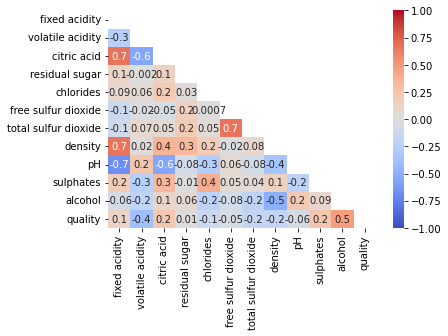

In [27]:
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, fmt='.1g',vmin=-1, vmax=1, center= 0, mask=matrix, cmap= 'coolwarm')

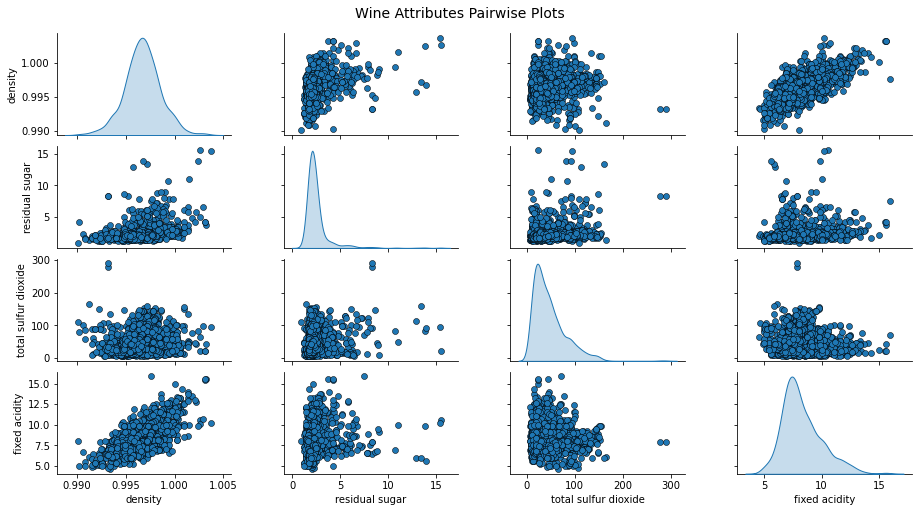

In [30]:
# Pair-wise Scatter Plots
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']
pp = sns.pairplot(df[cols], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

Text(0, 0.5, 'Wine Alcohol %')

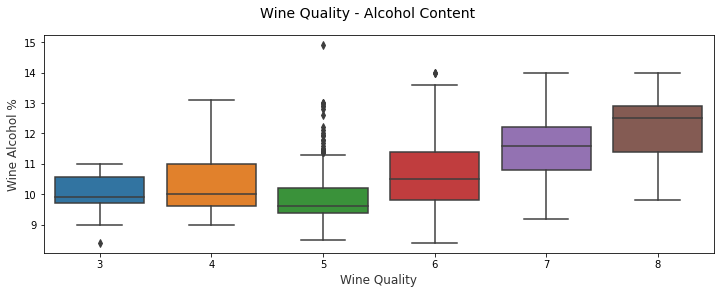

In [33]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality - Alcohol Content', fontsize=14)

sns.boxplot(x="quality", y="alcohol", data=df,  ax=ax)
ax.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

Примечание:
Качество имеет обратную корелляцию с летучей кислотностью
И прямую с крепостью

Летучая кислотность (Volatile acidity, VA), как и следует из названия – это та часть кислот в вине, которую можно уловить носом (в отличие от тех кислот, которые ощутимы на вкус).

Основные виновники – уксусная кислота (пахнет уксусом) и её эфир – этилацетат (пахнет лаком для ногтей). Соотношение этих соединений может заметно разниться.

Как и в случае с бреттаномицесом, бактерия, ответственная за летучую кислотность, активно развивается в условиях низкой кислотности и высокого содержания сахаров.

Хотя высокий уровень летучей кислотности считается нежелательным, в некоторых случаях небольшой её уровень может быть очень кстати, особенно в ботритизированных винах.

# Многомерный анализ данных

## Мультиколлинеарность (Критерий Краскела — Уоллиса)

In [15]:
alpha = 0.05
columns = df.columns
columns.drop('quality') 
print('2 параметра и целевой')
for column1 in df:
    for column2 in df:
        if columns.get_loc(column1) < columns.get_loc(column2):
            stat, p =  kruskal(df[column1], df[column2], df['quality'])
            print('Statistics=%.3f, p=%.3f' % (stat, p))
            if p > alpha:
                print('Одинаковое распределение (не удается отклонить H0)')
            else:
                print('Различные распределения (отклонить H0)')
print('3 параметра и целевой')
for column1 in df:
    for column2 in df:
        for column3 in df:      
            if columns.get_loc(column1) < columns.get_loc(column2) and columns.get_loc(column2) < columns.get_loc(column3):
                stat, p =  kruskal(df[column1], df[column2], df[column3], df['quality'])
                print('Statistics=%.3f, p=%.3f' % (stat, p))
                if p > alpha:
                    print('Одинаковое распределение (не удается отклонить H0)')
                else:
                    print('Различные распределения (отклонить H0)')

2 параметра и целевой
Statistics=3464.414, p=0.000
Различные распределения (отклонить H0)
Statistics=3464.503, p=0.000
Различные распределения (отклонить H0)
Statistics=3231.030, p=0.000
Различные распределения (отклонить H0)
Statistics=3464.431, p=0.000
Различные распределения (отклонить H0)
Statistics=1908.890, p=0.000
Различные распределения (отклонить H0)
Statistics=3400.318, p=0.000
Различные распределения (отклонить H0)
Statistics=3464.390, p=0.000
Различные распределения (отклонить H0)
Statistics=3436.767, p=0.000
Различные распределения (отклонить H0)
Statistics=3464.471, p=0.000
Различные распределения (отклонить H0)
Statistics=2984.686, p=0.000
Различные распределения (отклонить H0)
Statistics=2281.110, p=0.000
Различные распределения (отклонить H0)
Statistics=3114.493, p=0.000
Различные распределения (отклонить H0)
Statistics=3506.499, p=0.000
Различные распределения (отклонить H0)
Statistics=3624.145, p=0.000
Различные распределения (отклонить H0)
Statistics=3219.756, p=0.0

Различные распределения (отклонить H0)
Statistics=5091.938, p=0.000
Различные распределения (отклонить H0)
Statistics=4622.325, p=0.000
Различные распределения (отклонить H0)
Statistics=4996.745, p=0.000
Различные распределения (отклонить H0)
Statistics=4555.600, p=0.000
Различные распределения (отклонить H0)
Statistics=4667.336, p=0.000
Различные распределения (отклонить H0)
Statistics=4723.413, p=0.000
Различные распределения (отклонить H0)
Statistics=5026.597, p=0.000
Различные распределения (отклонить H0)
Statistics=5029.138, p=0.000
Различные распределения (отклонить H0)
Statistics=4736.940, p=0.000
Различные распределения (отклонить H0)
Statistics=5027.015, p=0.000
Различные распределения (отклонить H0)
Statistics=5009.244, p=0.000
Различные распределения (отклонить H0)
Statistics=4435.724, p=0.000
Различные распределения (отклонить H0)
Statistics=4408.956, p=0.000
Различные распределения (отклонить H0)
Statistics=4721.417, p=0.000
Различные распределения (отклонить H0)
Statistic

## Многомерная визуализация

<AxesSubplot:xlabel='volatile acidity', ylabel='alcohol'>

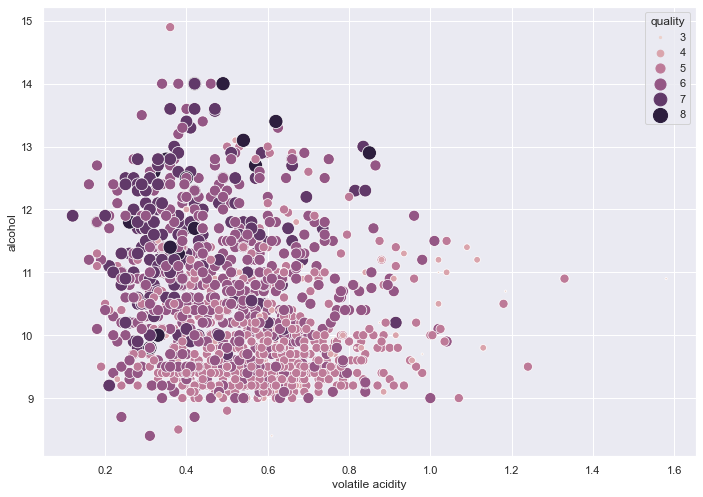

In [49]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x='volatile acidity', y='alcohol', data=df, hue='quality', size='quality', sizes=(5, 200) )

# Выводы
Существует смещение, что наиболее высокие оценки получает вино с высокой крепостью и маным содержанием летучей кислотности